In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3


In [3]:
import tensorflow as tf
import os

In [4]:
gpus = tf.config.experimental.list_physical_devices('CPU')
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
gpus= tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
import cv2
import imghdr
from matplotlib import pyplot as plt
import shutil

In [7]:
DR = "/content/drive/MyDrive/dr_dataset1/DR"
No_DR = "/content/drive/MyDrive/dr_dataset1/No_DR"

In [8]:

len(os.listdir(No_DR))

706

In [9]:
len(os.listdir(DR))

722

In [10]:
img=cv2.imread(os.path.join('/content/drive/MyDrive/dr_dataset1/DR/1000.jpg'))
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

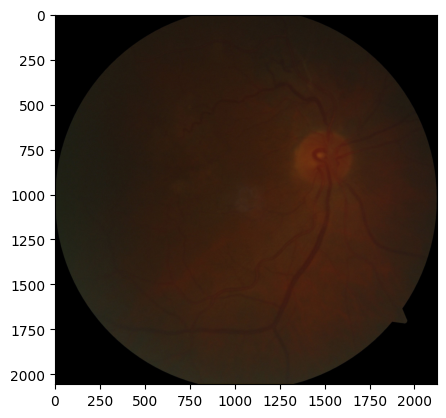

In [11]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [12]:
data_dir = "/content/drive/MyDrive/dr_dataset1"


In [13]:
import numpy as np

In [14]:
!ls /content/drive/MyDrive/dr_dataset1

DR  No_DR


In [15]:
data=tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/dr_dataset1')

Found 1428 files belonging to 2 classes.


In [16]:
data_iterator = data.as_numpy_iterator()

In [17]:
batch =  data_iterator.next()

In [18]:
batch[0].shape

(32, 256, 256, 3)

In [19]:
batch[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

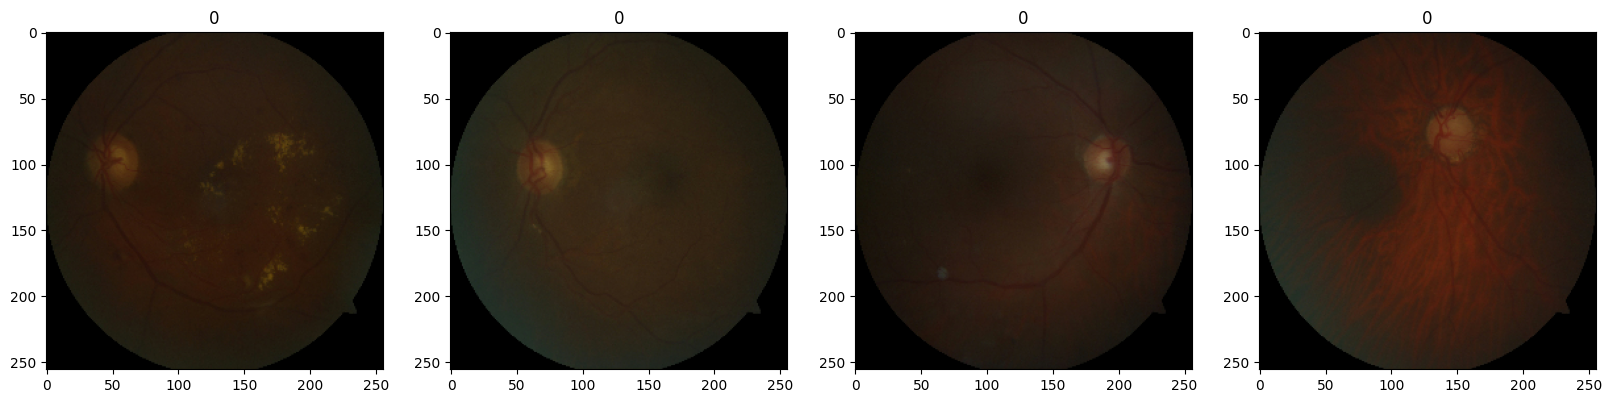

In [20]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [21]:
data = data.map(lambda x,y: (x/255,y))

In [22]:
scaled_iterator = data.as_numpy_iterator()

In [23]:
batch = scaled_iterator.next()

In [24]:
batch[0].max()

0.9945466

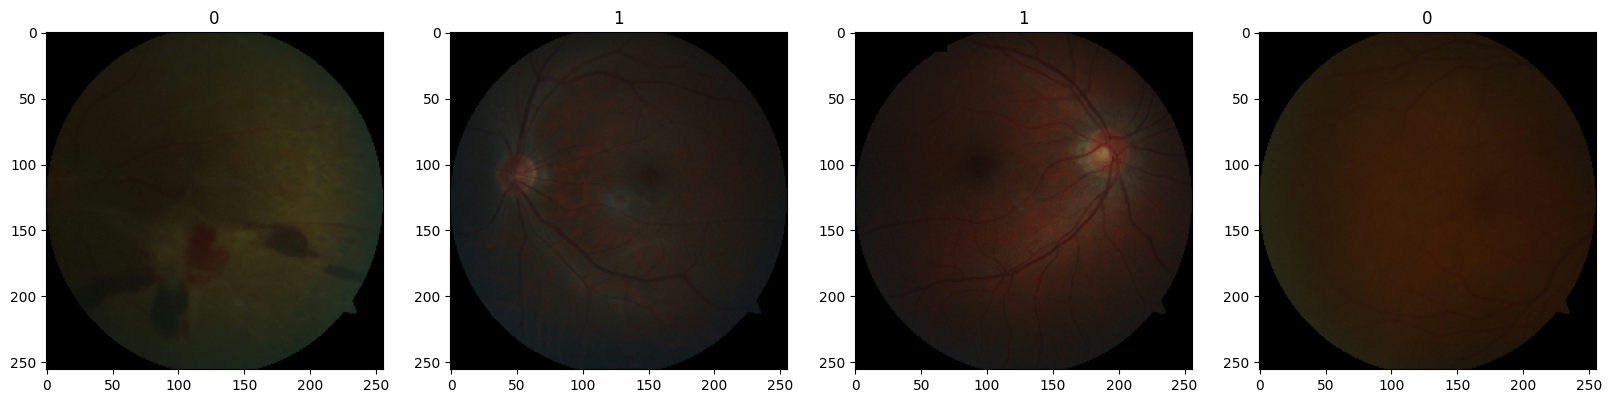

In [25]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [26]:
len(data)

45

In [27]:
train_size = int(len(data)*.7)
val_size = int(len(data)* .2)
test_size = int(len(data)* .1)

In [28]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [29]:
print(train_size, val_size, test_size)

31 9 4


In [30]:
len(test)

4

In [31]:
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,GlobalAveragePooling2D
from tensorflow.keras import Model
from tensorflow.keras import regularizers

In [32]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50

In [40]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

In [41]:
for layer in base_model.layers:
    layer.trainable = False

In [42]:
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(300, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=base_model.input, outputs=output)

In [43]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
             loss=tf.losses.BinaryCrossentropy(),
             metrics = ["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [44]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [45]:
model.fit(train, epochs=5, validation_data=val)

Epoch 1/5
31/31 [==============================] - 1219s 38s/step - loss: 0.5509 - accuracy: 0.7913 - precision_1: 0.8188 - recall_1: 0.7439 - val_loss: 12.2545 - val_accuracy: 0.5035 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/5
31/31 [==============================] - 1201s 38s/step - loss: 0.3599 - accuracy: 0.8488 - precision_1: 0.8627 - recall_1: 0.8238 - val_loss: 37.0464 - val_accuracy: 0.4618 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 3/5
31/31 [==============================] - 1180s 38s/step - loss: 0.2830 - accuracy: 0.8891 - precision_1: 0.9013 - recall_1: 0.8678 - val_loss: 0.9022 - val_accuracy: 0.5208 - val_precision_1: 0.5208 - val_recall_1: 1.0000
Epoch 4/5
31/31 [==============================] - 1202s 38s/step - loss: 0.2895 - accuracy: 0.8891 - precision_1: 0.9034 - recall_1: 0.8663 - val_loss: 1.0783 - val_accuracy: 0.4931 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 5/5
31/31 [=============================

In [46]:
model.evaluate(test)

4/4 [==============================] - 88s 9s/step - loss: 0.8022 - accuracy: 0.4609 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00


[0.8022230863571167, 0.4609375, 0.0, 0.0]